In [1]:
# libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import nltk
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from keras.preprocessing.text import Tokenizer
from scipy import sparse

# Task1: The trend of review scores of the best product.

In [2]:
df = pd.read_csv('Reviews.csv')
df['Helpful %'] = np.where(df['HelpfulnessDenominator'] > 0, df['HelpfulnessNumerator'] / df['HelpfulnessDenominator'], -1)
df['% Upvote'] = pd.cut(df['Helpful %'], bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'], include_lowest = True)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %,% Upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,Empty
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,Empty


In [3]:
df['Time'] = pd.to_datetime(df['Time'], unit='s')

Text(0.5, 1, 'How helpful users find among user scores')

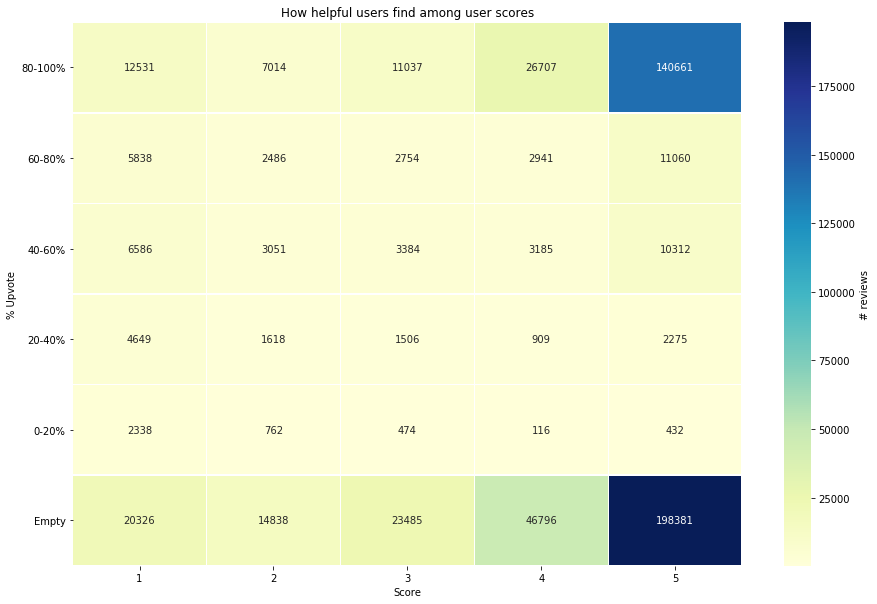

In [4]:
df_tmp = df.groupby(['Score', '% Upvote']).agg({'Id': 'count'})
df_tmp = df_tmp.unstack()
df_tmp.columns = df_tmp.columns.get_level_values(1)
fig = plt.figure(figsize=(15,10))

sns.heatmap(df_tmp[df_tmp.columns[::-1]].T, cmap = 'YlGnBu', linewidths=.5, annot = True, fmt = 'd', cbar_kws={'label': '# reviews'})
plt.yticks(rotation=0)
plt.title('How helpful users find among user scores')

Top 10 productID by score

In [5]:
df_score = df.groupby(['ProductId']).agg({'Score': 'count'})
data_df = df_score.sort_values(by='Score',ascending=False)[:10]
data_df.reset_index(inplace=True)
data_df

,ProductId,Score
0,B007JFMH8M,913
1,B0026RQTGE,632
2,B002QWHJOU,632
3,B002QWP89S,632
4,B002QWP8H0,632
5,B003B3OOPA,623
6,B001EO5Q64,567
7,B0026KPDG8,564
8,B000VK8AVK,564
9,B006HYLW32,564


[(0, 5)]

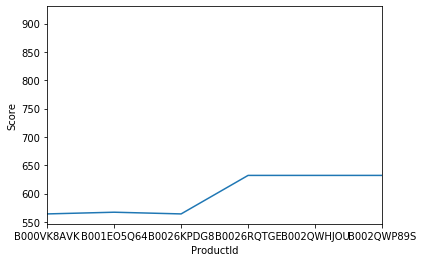

In [6]:
g = sns.lineplot(x="ProductId", y="Score", data=data_df)
g.set(xlim=(0,5))

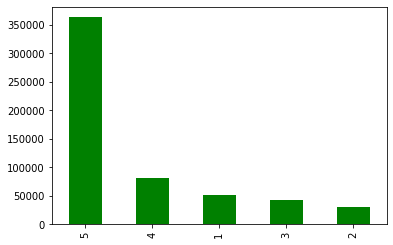

In [7]:
ax=df.Score.value_counts().plot(kind='bar',color='g')
fig = ax.get_figure()
fig.savefig("score.png")

In [8]:
df_t = df[df['ProductId'] == 'B007JFMH8M']

df_t = df_t.groupby(['Time']).agg({'Score': 'count'})
time_df = df_t.sort_values(by='Time',ascending=False)
time_df.reset_index(inplace=True)


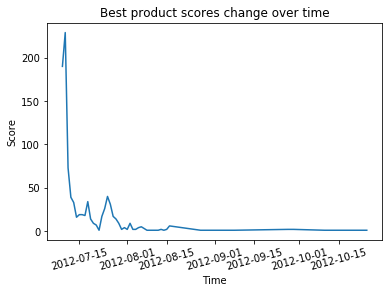

In [9]:
sns.lineplot(x="Time", y="Score", data=time_df)
plt.xticks(rotation=15)
plt.title('Best product scores change over time')
plt.show()

# Task2: The word cloud of the worst reviews.

In [10]:
tokenizer = Tokenizer(
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    split=" ")
tokenizer.fit_on_texts(df.Text.values)
print(tokenizer.document_count)

568454


In [11]:
#100 top words
word_counts = sorted(tokenizer.word_counts.items(), key=lambda k: k[1], reverse=True)
word_counts[:100]

[('the', 1872496),
 ('i', 1508855),
 ('and', 1289769),
 ('a', 1235881),
 ('to', 1015420),
 ('it', 933117),
 ('of', 802080),
 ('is', 734355),
 ('this', 674741),
 ('br', 647089),
 ('for', 552558),
 ('in', 547882),
 ('my', 463882),
 ('that', 432823),
 ('but', 376357),
 ('with', 353189),
 ('have', 345427),
 ('not', 335163),
 ('you', 333698),
 ('are', 319015),
 ('was', 315683),
 ('they', 289101),
 ('as', 279846),
 ('on', 272477),
 ('so', 256193),
 ('like', 256178),
 ('these', 234692),
 ('them', 211836),
 ('good', 200547),
 ('be', 189210),
 ('or', 181722),
 ('at', 180180),
 ('one', 175725),
 ('just', 172914),
 ('taste', 172698),
 ('if', 170419),
 ('very', 167562),
 ('product', 167311),
 ('great', 167149),
 ('coffee', 165961),
 ('all', 159696),
 ('flavor', 147838),
 ('from', 145965),
 ("it's", 139333),
 ('tea', 137390),
 ('can', 136544),
 ('when', 136429),
 ('more', 136004),
 ('we', 132237),
 ('has', 131358),
 ('me', 130625),
 ('food', 128260),
 ('love', 127466),
 ('had', 127355),
 ('will', 1

In [12]:
#Library for building wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = set(STOPWORDS)
#stopwords.update(["Subject","re","fw","fwd"])

h1 = df[df["Score"]==1]["Summary"]
collapsed_h1 = h1.str.cat(sep=' ')
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_words=50).generate(collapsed_h1)

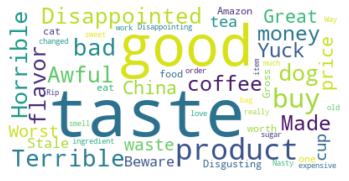

In [13]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [14]:
h5 = df[df["Score"]==2]["Summary"]
collapsed_h5 = h5.str.cat(sep=' ')
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_words=50).generate(collapsed_h5)

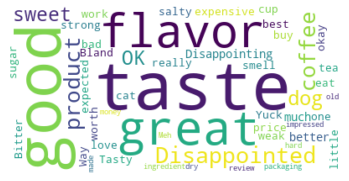

In [15]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Task3: Amazon fine food recommendation System

In [16]:
# load the data set
reviews_df = pd.read_csv('Reviews.csv')
reviews_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [17]:
# have a view of reviews_df
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [18]:
reviews_df['ProductId'].describe()

count         568454
unique         74258
top       B007JFMH8M
freq             913
Name: ProductId, dtype: object

In [19]:
# create the review corpus from Summary and Text
reviews_df["Corpus"] = reviews_df["Summary"].map(str) + ". " + reviews_df["Text"].map(str)
reviews_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Corpus
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Good Quality Dog Food. I have bought several o...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not as Advertised. Product arrived labeled as ...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,"""Delight"" says it all. This is a confection th..."
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Cough Medicine. If you are looking for the sec...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Great taffy. Great taffy at a great price. Th...


In [20]:
# select the columns for recommendation
recomm_df = reviews_df[['ProductId', 'Score', 'Corpus']]
recomm_df.head()
#recomm_df.shape:(568454, 3)

,ProductId,Score,Corpus
0,B001E4KFG0,5,Good Quality Dog Food. I have bought several o...
1,B00813GRG4,1,Not as Advertised. Product arrived labeled as ...
2,B000LQOCH0,4,"""Delight"" says it all. This is a confection th..."
3,B000UA0QIQ,2,Cough Medicine. If you are looking for the sec...
4,B006K2ZZ7K,5,Great taffy. Great taffy at a great price. Th...


In [21]:
recomm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ProductId  568454 non-null  object
 1   Score      568454 non-null  int64 
 2   Corpus     568454 non-null  object
dtypes: int64(1), object(2)
memory usage: 13.0+ MB


## For the same product different customers have different reviews.
## So, we put the reviews of the same product with the same score together.

In [22]:
# concatenate corpus of the same product with the same score
recomm_df = recomm_df.groupby(['ProductId','Score'], sort=False)['Corpus'].apply(' '.join).reset_index()

In [23]:
recomm_df

,ProductId,Score,Corpus
0,B001E4KFG0,5,Good Quality Dog Food. I have bought several o...
1,B00813GRG4,1,Not as Advertised. Product arrived labeled as ...
2,B000LQOCH0,4,"""Delight"" says it all. This is a confection th..."
3,B000UA0QIQ,2,Cough Medicine. If you are looking for the sec...
4,B006K2ZZ7K,5,Great taffy. Great taffy at a great price. Th...
...,...,...,...
137066,B001EO7N10,5,"Best Value for Chinese 5 Spice. As a foodie, I..."
137067,B001EO7N10,2,Mixed wrong. I had ordered some of these a few...
137068,B003S1WTCU,2,disappointed. I'm disappointed with the flavor...
137069,B004I613EE,5,Perfect for our maltipoo. These stars are smal...


In [24]:
# preprocess the corpus
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop_words_ = set(stopwords.words('english'))
wn = WordNetLemmatizer()

In [25]:
def corpus_pre(text):
  text = re.sub("'", "",text)
  text=re.sub("(\\d|\\W)+"," ",text) 
  text = text.replace("nbsp", "")
  tokens = [ wn.lemmatize(word, pos="v") for word in word_tokenize(text.lower()) 
            if ((word not in stop_words_) and (word not in list(string.punctuation))  and (len(word)>2))]
  return " ".join(tokens)

In [26]:
recomm_df['Corpus'] = recomm_df['Corpus'].apply(corpus_pre)

In [27]:
recomm_df.head()

,ProductId,Score,Corpus
0,B001E4KFG0,5,good quality dog food buy several vitality can...
1,B00813GRG4,1,advertise product arrive label jumbo salt pean...
2,B000LQOCH0,4,delight say confection around centuries light ...
3,B000UA0QIQ,2,cough medicine look secret ingredient robituss...
4,B006K2ZZ7K,5,great taffy great taffy great price wide assor...


## In information retrieval, tf–idf, TF*IDF, or TFIDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.[1] It is often used as a weighting factor in searches of information retrieval, text mining, and user modeling. 
## Variations of the tf–idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.
## (from Wikipedia)

In [28]:
# tfidf of the corpus
tfidf_vectorizer = TfidfVectorizer()
recomm_tfidf = tfidf_vectorizer.fit_transform((recomm_df['Corpus'])) #fitting and transforming the vector
recomm_tfidf

<137071x107334 sparse matrix of type '<class 'numpy.float64'>'
	with 12159139 stored elements in Compressed Sparse Row format>

In [29]:
# to save recomm_tfidf (sparse matrix)
sparse.save_npz("recomm_tfidf.npz", recomm_tfidf)

In [30]:
# read the recomm_tfidf from recomm_tfidf.npz
recomm_tfidf_back = sparse.load_npz("recomm_tfidf.npz")

In [31]:
# recommendation system test example
test = pd.read_csv('test.csv')
test['Text']

0    The candy is just red , No flavor . Just plan ...
Name: Text, dtype: object

## Cosine similarity:

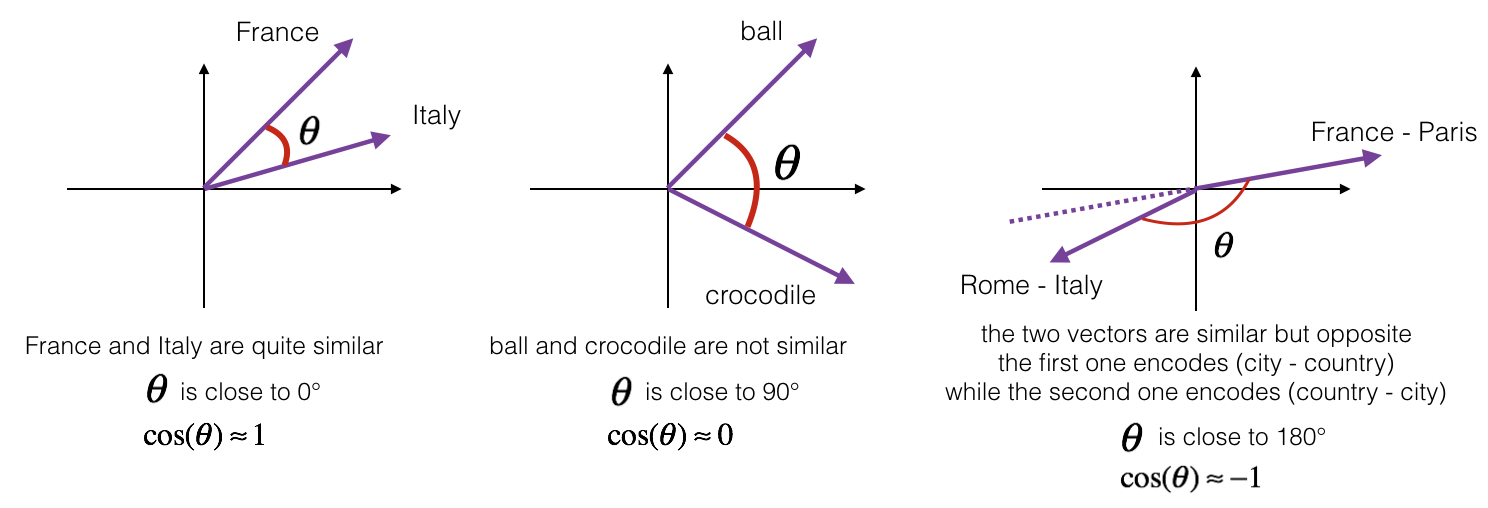

# Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space. 
# In information retrieval and text mining, each term is notionally assigned a different dimension and a document is characterised by a vector where the value in each dimension corresponds to the number of times the term appears in the document. 
# Cosine similarity then gives a useful measure of how similar two documents are likely to be in terms of their subject matter.
## (from Wikipedia)

In [32]:
# get the cosine similarity between test_tfidf and recomm_tfidf
test_tfidf = tfidf_vectorizer.transform(test['Text'])
cos_similarity_tfidf = map(lambda x: cosine_similarity(test_tfidf, x),recomm_tfidf)

In [33]:
test_tfidf = tfidf_vectorizer.transform(test['Text'])
cos_similarity_tfidf_back = map(lambda x: cosine_similarity(test_tfidf, x),recomm_tfidf_back)

In [34]:
# get the recommendation for the test example
output = list(cos_similarity_tfidf)
top = sorted(range(len(output)), key=lambda i: output[i], reverse=True)[:10]
list_scores = [output[i][0][0] for i in top]
recommendation = pd.DataFrame(columns = ['ProductId', 'Score',  'Corpus', 'Recommendation_score'])
index = 0
for i in top:
    recommendation.at[index, 'ProductId'] = recomm_df['ProductId'][i]
    recommendation.at[index, 'Score'] = recomm_df['Score'][i]
    recommendation.at[index, 'Corpus'] = recomm_df['Corpus'][i]
    recommendation.at[index, 'Recommendation_score'] =  list_scores[index]

In [35]:
output_back = list(cos_similarity_tfidf_back)
top_back = sorted(range(len(output_back)), key=lambda i: output_back[i], reverse=True)[:10]
list_scores_back = [output_back[i][0][0] for i in top_back]
recommendation_back = pd.DataFrame(columns = ['ProductId', 'Score',  'Corpus', 'Recommendation_score'])
index = 0
for i in top:
    recommendation_back.at[index, 'ProductId'] = recomm_df['ProductId'][i]
    recommendation_back.at[index, 'Score'] = recomm_df['Score'][i]
    recommendation_back.at[index, 'Corpus'] = recomm_df['Corpus'][i]
    recommendation_back.at[index, 'Recommendation_score'] =  list_scores_back[index]

In [36]:
recommendation

,ProductId,Score,Corpus,Recommendation_score
0,B000FNB7UY,4,taste quality yummy banana chewy candy great s...,0.884528


In [37]:
recommendation_back

,ProductId,Score,Corpus,Recommendation_score
0,B000FNB7UY,4,taste quality yummy banana chewy candy great s...,0.884528


In [38]:
pd.options.display.max_colwidth = 500

In [39]:
test_output = reviews_df.loc[reviews_df['ProductId'] == recommendation_back.iloc[0]['ProductId']]
test_output

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Corpus
26726,26727,B000FNB7UY,A1XMESDTSSRZHJ,ilmq5210,0,0,4,1328832000,same taste same quality,"This yummy banana chewy candy is a great sweet tooth satisfier. I remember this candy back in the days of my childhood years, It tastes just as good now as it did growing up. I recommend this candy for anyone that loves a sweet banana flavored chewy candy.<br />I must say it's better than Laffy Taffy!!!!","same taste same quality. This yummy banana chewy candy is a great sweet tooth satisfier. I remember this candy back in the days of my childhood years, It tastes just as good now as it did growing up. I recommend this candy for anyone that loves a sweet banana flavored chewy candy.<br />I must say it's better than Laffy Taffy!!!!"


In [40]:
test_output.to_csv('test_output.csv', index=False)